# DAY 1

## 1. 텐서(Tensor)

### 1) 스칼라(0차원)

In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
import time

In [2]:
x = torch.tensor(10)

print(x)
print(x.size())
print(x.dim())

tensor(10)
torch.Size([])
0


### 2) 벡터(1차원)

In [3]:
x = torch.tensor([5,6])

print(x)
print(x.size())
print(x.dim())

tensor([5, 6])
torch.Size([2])
1


### 3) 행렬(2차원)

In [4]:
x = torch.tensor([[5,6,7],[8,9,10],[11,12,13]])

print(x)
print(x.size())
print(x.dim())

tensor([[ 5,  6,  7],
        [ 8,  9, 10],
        [11, 12, 13]])
torch.Size([3, 3])
2


In [5]:
x[:2]

tensor([[ 5,  6,  7],
        [ 8,  9, 10]])

- numpy에 익숙하면 어렵지 않다.

### 4) 3차원 텐서

In [6]:
x = torch.tensor([[[1,2],[3,4],[5,6]], [[1,2],[3,4],[5,6]]])

print(x)
print(x.size())
print(x.dim())

tensor([[[1, 2],
         [3, 4],
         [5, 6]],

        [[1, 2],
         [3, 4],
         [5, 6]]])
torch.Size([2, 3, 2])
3


- matrix 묶음을 동일 차원에 묶어둔 거라고 생각하자

In [7]:
## 대표적인 3차원 텐서인 이미지 데이터
pytorch_image = np.array(Image.open('PyTorch_image.jpg').resize((224,224)))
pytorch_image.shape

(224, 224, 3)

- 이미지 사이즈를 224, 224로 변경한 것이다.
- 파일을 불러오는 시점에서 사이즈를 변경하면, 변경된 사이즈로 3채널 array가 만들어진다.

In [8]:
pytorch_image_tensor = torch.from_numpy(pytorch_image)
pytorch_image_tensor.size()

torch.Size([224, 224, 3])

### 5) 텐서 슬라이싱

In [9]:
x = torch.tensor([1,2,3,4,5,6,7,8,9,])
print('앞에서 5번째 까지 :', x[:5])
print('뒤에서 5번째 까지 :', x[:-5])

앞에서 5번째 까지 : tensor([1, 2, 3, 4, 5])
뒤에서 5번째 까지 : tensor([1, 2, 3, 4])


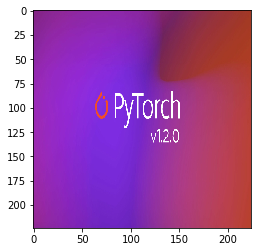

In [10]:
## 모든 채널의 이미지
plt.imshow(pytorch_image_tensor)

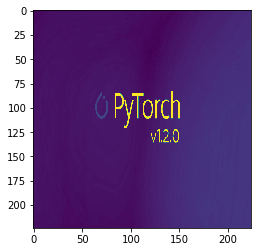

In [11]:
## 하나의 채널만 선택한 이미지
plt.imshow(pytorch_image_tensor[:,:,1])

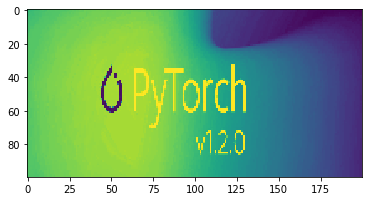

In [12]:
## 하나의 채널만 선택하고 이미지의 특정 범위를 선택
plt.imshow(pytorch_image_tensor[50:150,20:220,2])

In [13]:
### torch.eye()는 대각 성분의 값이 1인 matrix를 생성한다
x = torch.eye(3,3)
print(x[0,0])
print(x[1,1])
print(x[2,2])

tensor(1.)
tensor(1.)
tensor(1.)


In [14]:
torch.eye(3,3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [15]:
torch.eye(3,3)*3

tensor([[3., 0., 0.],
        [0., 3., 0.],
        [0., 0., 3.]])

In [16]:
torch.eye(3,3) + torch.eye(3,3)

tensor([[2., 0., 0.],
        [0., 2., 0.],
        [0., 0., 2.]])

- numpy.array() 처럼 사용할 수 있다.

### 6) 4차원 텐서

In [17]:
### 여러장의 이미지를 배치로 구성하기 위해 4차원 텐서를 구성함
image_files = glob.glob('*.jpg')
image_files

['PyTorch_image.jpg',
 'PyTorch_image1.jpg',
 'PyTorch_image2.jpg',
 'PyTorch_image3.jpg']

In [18]:
pytorch_images = np.array([np.array(Image.open(file).resize((244,244))) for file in image_files])
pytorch_images.shape

(4, 244, 244, 3)

In [19]:
pytorch_images_tensor = torch.from_numpy(pytorch_images)
pytorch_images_tensor.size()

torch.Size([4, 244, 244, 3])

### 7) 5차원 텐서

- 5차원 텐서는 대표적으로 동영상이 있다.
- 차원에 따라 (동영상의 수, 동영상 프레임, 화면 높이, 화면 너비, 화면 채널)으로 나타낼 수 있다.

### 8) 기본적인 텐서 연산

In [20]:
a = torch.rand(2,2)
b = torch.rand(2,2)
c = a + b
d = torch.add(a,b)
print('a :', a)
print('b :', b)
print('c :', c)
print('d :', d)

a : tensor([[0.9503, 0.0391],
        [0.3336, 0.4969]])
b : tensor([[0.8458, 0.4885],
        [0.1680, 0.7278]])
c : tensor([[1.7961, 0.5277],
        [0.5016, 1.2247]])
d : tensor([[1.7961, 0.5277],
        [0.5016, 1.2247]])


In [21]:
tmp_a = a + 5
print('tmp_a :', tmp_a)
print('a :', a)

tmp_a : tensor([[5.9503, 5.0391],
        [5.3336, 5.4969]])
a : tensor([[0.9503, 0.0391],
        [0.3336, 0.4969]])


In [22]:
## add_()는 +=과 같다
tmp_a = a.add_(5)
print('tmp_a :', tmp_a)
print('a :', a)

tmp_a : tensor([[5.9503, 5.0391],
        [5.3336, 5.4969]])
a : tensor([[5.9503, 5.0391],
        [5.3336, 5.4969]])


In [23]:
print('a :', a)
print('b :', b)
print('c :', c)
print('d :', d)

a : tensor([[5.9503, 5.0391],
        [5.3336, 5.4969]])
b : tensor([[0.8458, 0.4885],
        [0.1680, 0.7278]])
c : tensor([[1.7961, 0.5277],
        [0.5016, 1.2247]])
d : tensor([[1.7961, 0.5277],
        [0.5016, 1.2247]])


In [24]:
a*b

tensor([[5.0326, 2.4618],
        [0.8962, 4.0004]])

In [25]:
a.mul(b)

tensor([[5.0326, 2.4618],
        [0.8962, 4.0004]])

In [26]:
tmp_mul = a.mul_(b)

In [27]:
### a에 곱해진 값이 할당된다.
print('tmp_mul :', tmp_mul)
print('a :', a)
print('b :', b)

tmp_mul : tensor([[5.0326, 2.4618],
        [0.8962, 4.0004]])
a : tensor([[5.0326, 2.4618],
        [0.8962, 4.0004]])
b : tensor([[0.8458, 0.4885],
        [0.1680, 0.7278]])


### 9) 일반 연산과 GPU 적용 연산

In [28]:
a = torch.rand(10000, 10000)
b = torch.rand(10000, 10000)
## 벡터 내적

start = time.time()
tmp_result = a.matmul(b)
end = time.time()
print('Time :', end - start)

Time : 5.157221555709839


In [29]:
cuda_a = a.cuda()
cuda_b = b.cuda()

start = time.time()
tmp_result = cuda_a.matmul(cuda_b)
end = time.time()
print('Time :',end - start)

Time : 0.2762608528137207
